In [54]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import math

In [55]:
df = pd.read_csv(r"D:\DBDA\Adavance Stats\Day 6\titanic-tested.csv")


In [56]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [57]:
plt.figure(figsize=(20,50))


<Figure size 2000x5000 with 0 Axes>

<Figure size 2000x5000 with 0 Axes>

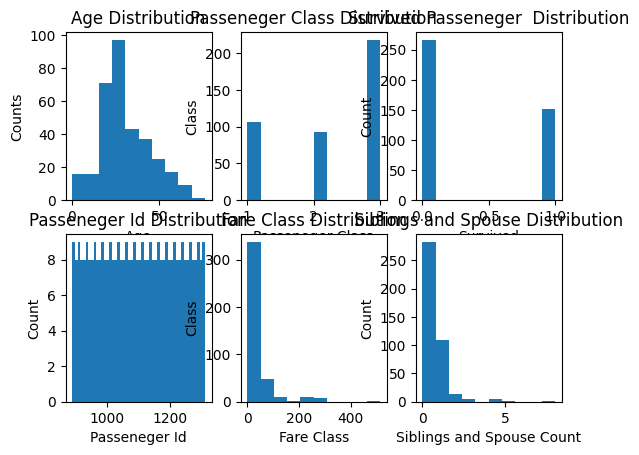

In [58]:
#check various column distribution
plt.subplot(2,3,1)
df['Age'].plot(kind='hist')
plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Age Distribution")
#plt.show()


plt.subplot(2,3,2)
df['Pclass'].plot(kind='hist')
plt.xlabel("Passeneger Class")
plt.ylabel("Class")
plt.title("Passeneger Class Distribution")
#plt.show()
plt.subplot(2,3,3)
df['Survived'].plot(kind='hist')
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Survived Passeneger  Distribution")
#plt.show()

plt.subplot(2,3,4)
df["PassengerId"].plot(kind='hist',bins=50)
plt.xlabel("Passeneger Id")
plt.ylabel("Count")
plt.title("Passeneger Id Distribution")
#plt.show()

plt.subplot(2,3,5)
df['Fare'].plot(kind='hist')
plt.xlabel("Fare Class")
plt.ylabel("Class")
plt.title("Fare Class Distribution")
#plt.show()

plt.subplot(2,3,6)
df['SibSp'].plot(kind='hist')
plt.xlabel("Siblings and Spouse Count")
plt.ylabel("Count")
plt.title("Siblings and Spouse Distribution")
#plt.show()


plt.savefig('first_plot.png')
plt.show()


In [51]:

# calculate and print the sample means 
#sample() function returns randomly selected rows 
#so take 10 samples of 50 each and calculate means
#replace =False will allow repeat selection of the same row in multiple samples

means_list = [df['Age'].sample(50,replace=False).mean for i in range(10)]

means_list

[<bound method Series.mean of 227     NaN
 291    30.0
 294    36.0
 95     25.0
 84      NaN
 162    26.0
 229    36.0
 199     NaN
 172    23.0
 361    24.0
 378    55.0
 299    29.0
 181    37.0
 58      NaN
 243     NaN
 318    27.0
 210    32.0
 300    32.0
 29      NaN
 310    18.0
 320    26.0
 287    24.0
 101    27.0
 253    24.0
 235    20.0
 416     NaN
 213    60.0
 203     8.0
 356    59.0
 27     22.5
 28     41.0
 270    46.0
 23     21.0
 311    22.0
 219     NaN
 347    38.0
 157    23.0
 275    20.0
 32     33.0
 336    32.0
 207    24.0
 69     60.0
 218    50.0
 90     22.0
 405    20.0
 231    21.0
 184    27.0
 195    33.0
 379     5.0
 257    28.0
 Name: Age, dtype: float64>,
 <bound method Series.mean of 21      9.0
 176    20.0
 227     NaN
 300    32.0
 332     NaN
 142    61.0
 15     24.0
 344     NaN
 83      NaN
 232    21.0
 221    21.0
 265     NaN
 178    36.0
 117     1.0
 158    42.0
 3      27.0
 239    48.0
 293    53.0
 182    18.0
 398    22.0
 43

TypeError: '<=' not supported between instances of 'method' and 'method'

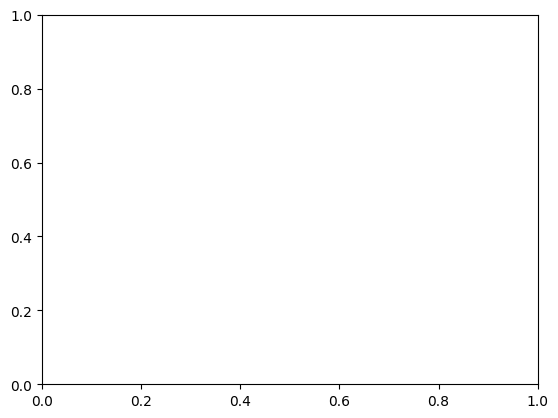

In [52]:
#plot histogram of a means_list

plt.hist(means_list, bins=10, edgecolor='black', alpha=0.7)
plt.xlabel("Mean age")
plt.ylabel("Frequency")
plt.title("Histogram of sample means")

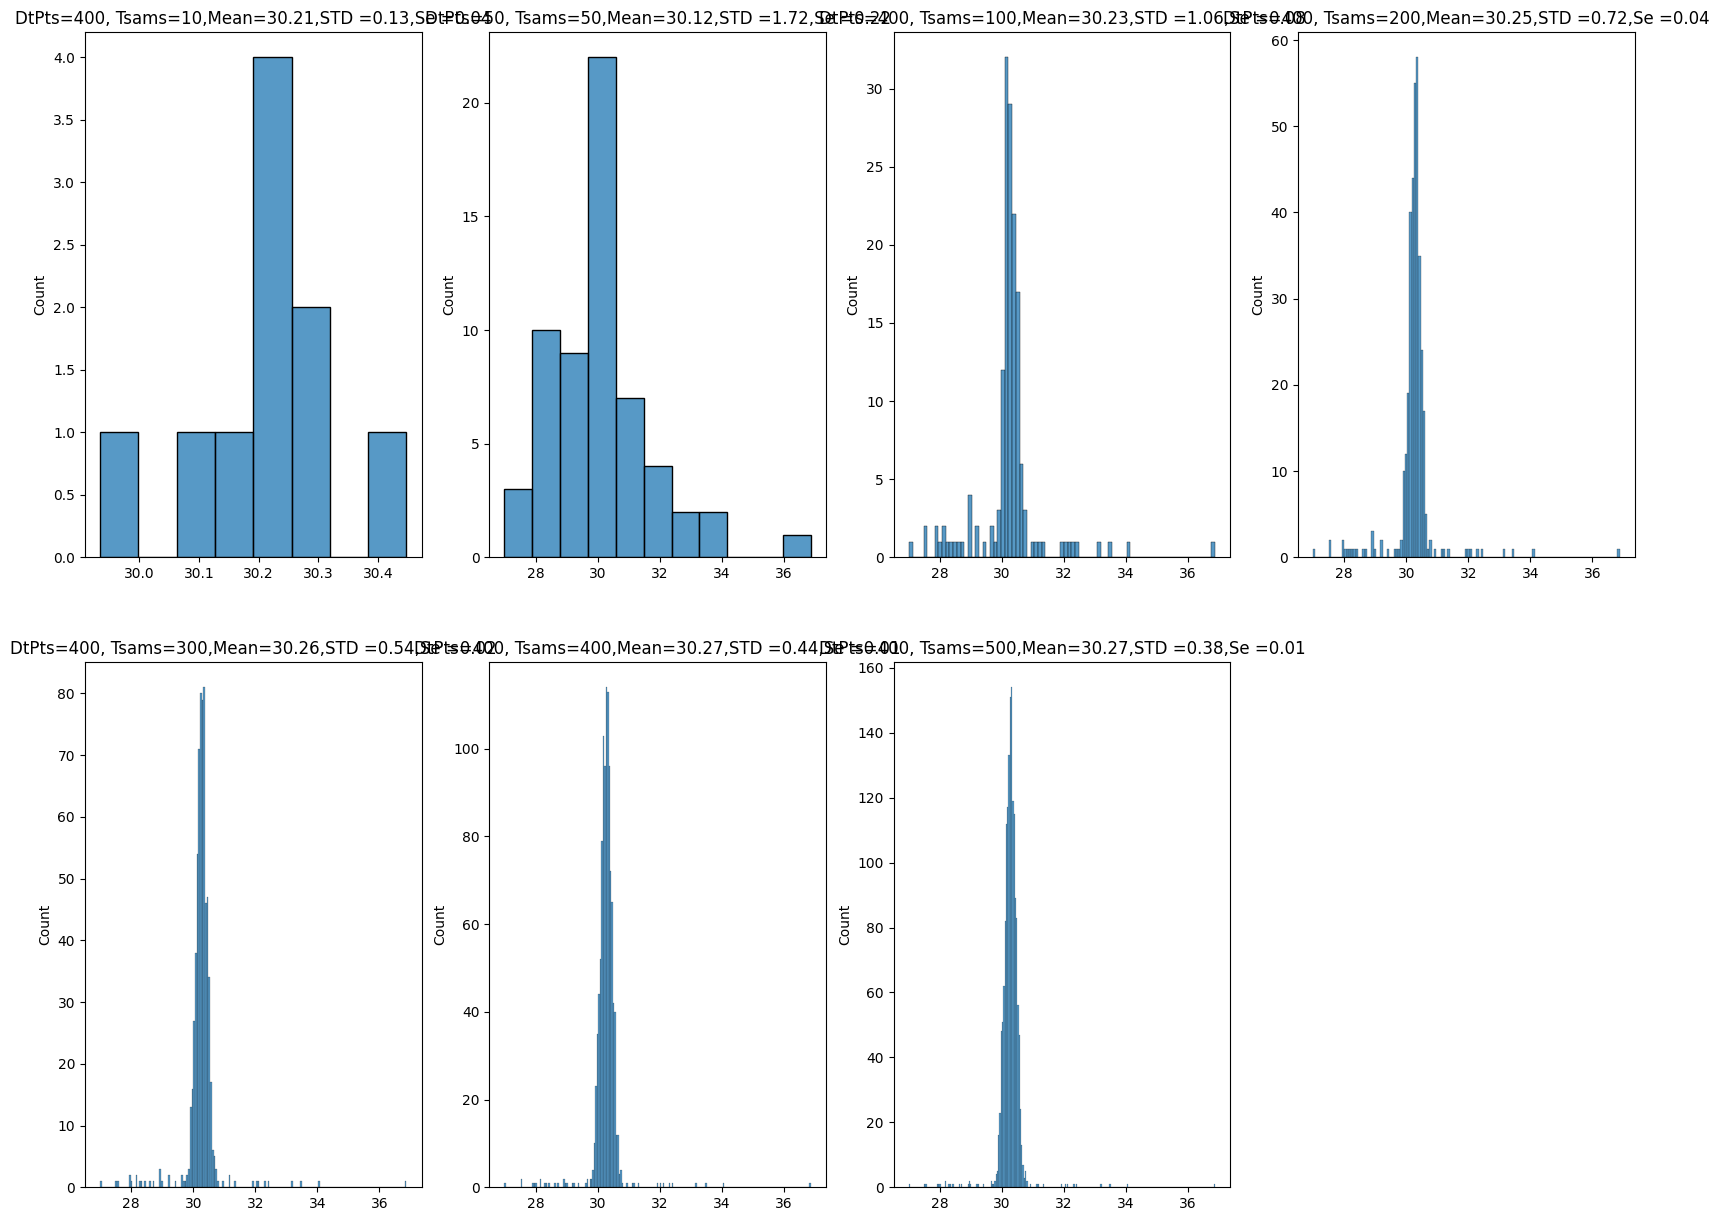

In [61]:
### Now let us keep changing the sample composition tosee the effect 
# for testing we will again take age column
#first define a list of a data points in each sample and how many such samples

dist_list = [(400,10),(50,50),(400,100),(400,200),(400,300),(400,400),(400,500)]

import statistics

sample_mean=[]

plt.figure(figsize=(20,15))
for i,j in enumerate(dist_list):
    for z in range(j[1]):
        x = df['Age'].sample(j[0],replace=False).mean()
        sample_mean.append(x)
    mn =np.mean(sample_mean)
    sd=statistics.stdev(sample_mean,mn)
    plt.subplot(2,4,i+1)
    sns.histplot(sample_mean)
    se=np.std(sample_mean,ddof=1)/ np.sqrt(np.size(sample_mean))
    plt.title(f"DtPts={j[0]}, Tsams={j[1]},Mean={mn:.2f},STD ={sd:.2f},Se ={se:.2f}")


plt.savefig('second_plot.png')
plt.show()


